In [36]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

In [37]:
image = cv2.imread('kitten.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 1

Напишите скрипт, который читает изображение из файла, выводит его на экран и 
выводит информацию о прочитанном изображении (размер, параметры изображения и 
др.). Интерпретируя загруженное изображение как двумерный массив, напишите 
функцию для поиска областей этого массива, в которых элементы отличаются от 
порогового значения 𝑏 не более чем на 2. Выведите эти области на экран. 


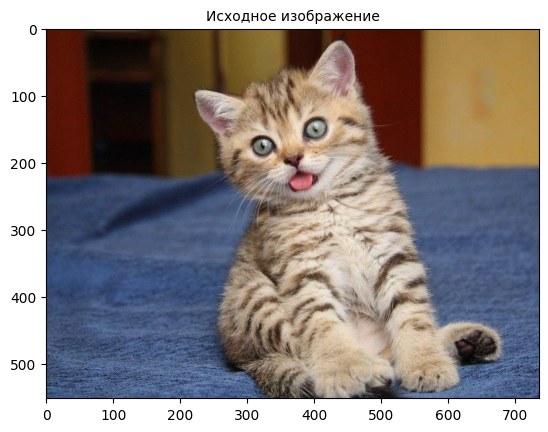

In [38]:
plt.imshow(image), plt.title('Исходное изображение', fontsize=10)
plt.show()

In [39]:
print(f'высота: {image.shape[0]}\nширина: {image.shape[1]}\nколичество каналов: {image.shape[2]}')

высота: 552
ширина: 736
количество каналов: 3


In [40]:
def find_area(image, b):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    for row in range(gray_image.shape[0]):
        for column in range(gray_image.shape[1]):
            if gray_image[row, column] > b + 2 or gray_image[row, column] < b - 2:
                gray_image[row, column] = 0
    return gray_image

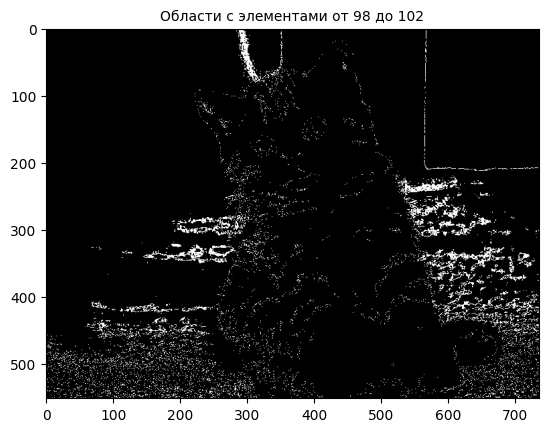

In [41]:
value_b = 100
result = find_area(image, b=value_b)
plt.imshow(result, cmap='gray'), plt.title(f'Области с элементами от {value_b-2} до {value_b+2}', fontsize=10)
plt.show()

# 2

Напишите скрипт для обработки заданного изображения. Ваш скрипт должен иметь возможность выполнять инверсию цветов, преобразование цветного изображения в черно-белое, поворот на 90 градусов против часовой стрелки, вырезание заданной области и обнуление пикселей, значение цвета которых меньше порогового. Выведите  все 6 полученных изображений в одно графическое окно. 

In [42]:
def inversion(image):
    return 255 - image

In [43]:
def black_white(image):
    gray_image = image.copy()
    for row in range(gray_image.shape[0]):
        for column in range(gray_image.shape[1]):
            red = gray_image[row, column, 0]
            green = gray_image[row, column, 1]
            blue = gray_image[row, column, 2]
            gray = 0.2989 * red + 0.5870 * green + 0.1140 * blue
            gray_image[row, column] = [gray, gray, gray]
    return np.clip(gray_image, 0, 255).astype(image.dtype)

In [44]:
def rotate(image):
    rotate_image = np.zeros((image.shape[1], image.shape[0], image.shape[2]), dtype=image.dtype)
    for row in range(image.shape[0]):
        for column in range(image.shape[1]):
            rotate_image[image.shape[1] - column - 1, row, :] = image[row, column, :]
    return rotate_image

In [45]:
def cut(image, x_cord, y_cord):
    return image[y_cord[0]:y_cord[1], x_cord[0]:x_cord[1]]

In [46]:
def null_pixel(image, b):
    copy_image = image.copy()
    for row in range(copy_image.shape[0]):
        for column in range(copy_image.shape[1]):
            red, green, blue = copy_image[row][column]
            if ((int(red) + int(green) + int(blue)) / 3) < b:
                copy_image[row, column] = [0, 0, 0]
    return copy_image

In [47]:
inversion_image = inversion(image)

In [48]:
black_white_image = black_white(image)

In [49]:
rotate_image = rotate(image)

In [50]:
cut_image = cut(image, x_cord=[250, 500], y_cord=[120, 300])

In [51]:
null_pixel_image = null_pixel(image, b=150)

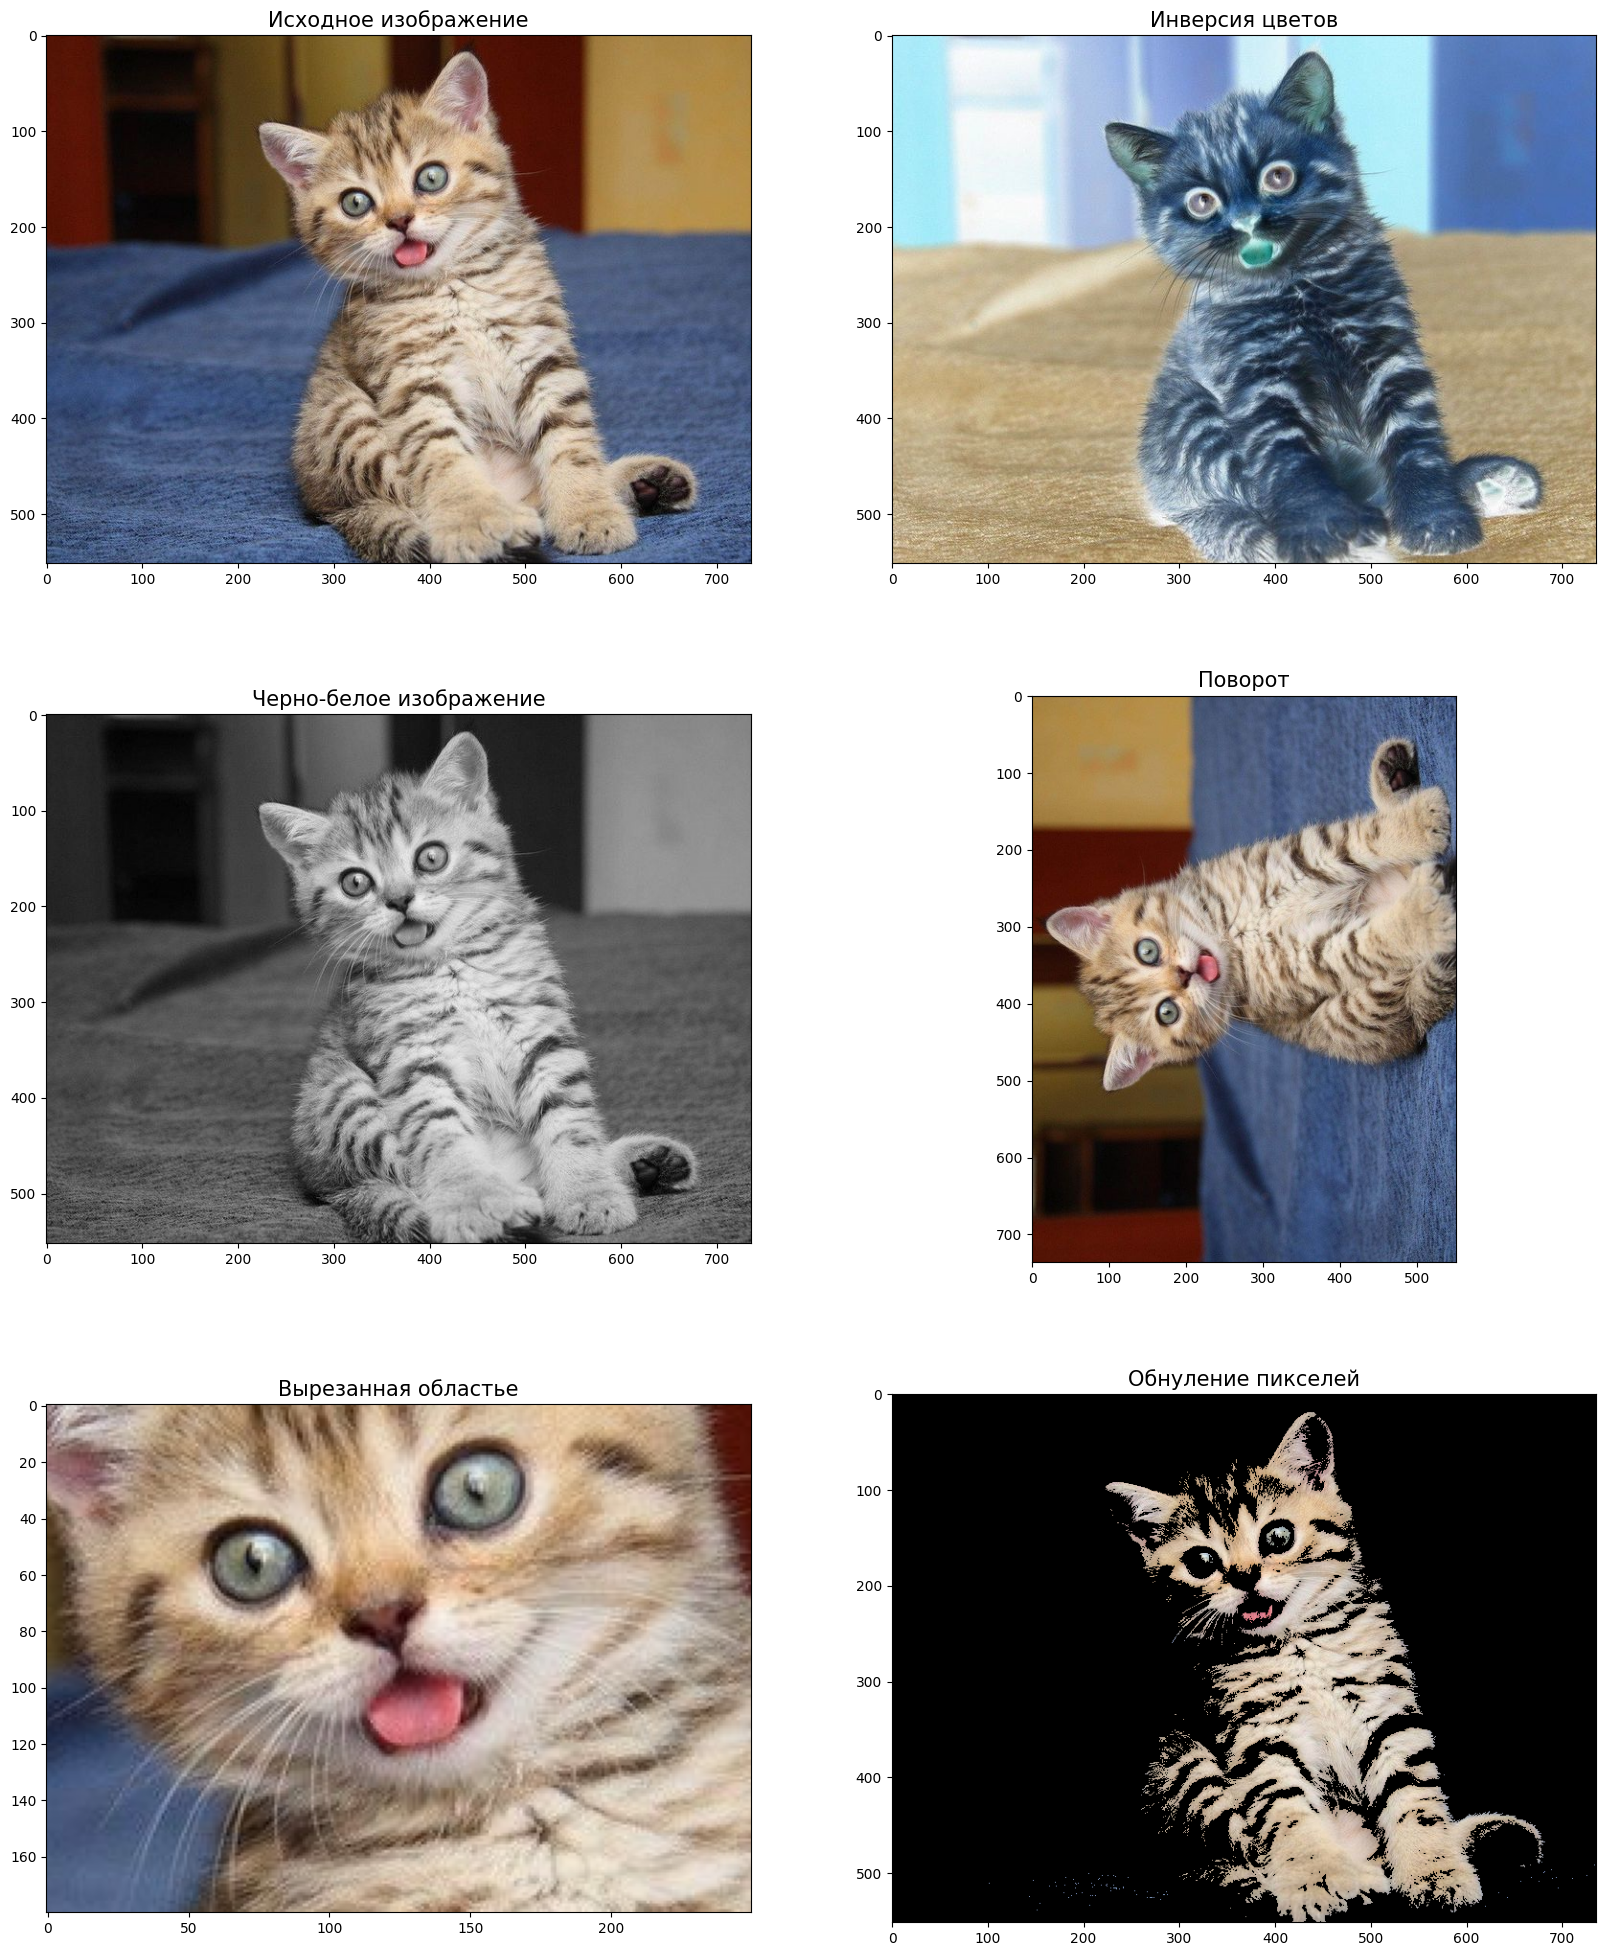

In [52]:
plt.figure(figsize=(20, 25))
plt.subplot(321), plt.imshow(image), plt.title('Исходное изображение', fontsize=15)
plt.subplot(322), plt.imshow(inversion_image), plt.title('Инверсия цветов', fontsize=15)
plt.subplot(323), plt.imshow(black_white_image, cmap='gray'), plt.title('Черно-белое изображение', fontsize=15)
plt.subplot(324), plt.imshow(rotate_image), plt.title('Поворот', fontsize=15)
plt.subplot(325), plt.imshow(cut_image), plt.title('Вырезанная областье', fontsize=15)
plt.subplot(326), plt.imshow(null_pixel_image), plt.title('Обнуление пикселей', fontsize=15)
plt.show()

# 3

Напишите скрипт для преобразования яркости изображения. Реализуйте все 
рассмотренные на лекции преобразования (пороговое, логарифмическое, степенное, 
кусочно-линейное и другие). 

In [53]:
def logarithmic_transformation(image, c):
    image_result = c * np.log1p(image)
    return np.clip(image_result, 0, 255).astype(image.dtype)

In [54]:
def power_transformation(image, c, gamma):
    image_result = c * np.power(image / 255, gamma)
    return np.clip(image_result, 0, 255).astype(image.dtype)

In [55]:
def threshold_transformation(image, c):
    image_result = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    for row in range(image_result.shape[0]):
        for column in range(image_result.shape[1]):
            if image_result[row, column] > c:
                image_result[row, column] = 255
            else:
                image_result[row, column] = 0
    return np.clip(image_result, 0, 255).astype(image.dtype)

In [56]:
def piecewise_linear_transformation(image, r1, r2, s1, s2):
    image_result = image.copy()
    for row in range(image_result.shape[0]):
        for column in range(image_result.shape[1]):
            for channel in range(image.shape[2]):
                if image_result[row, column, channel] >= 0 and image_result[row, column, channel] <= r1:
                    image_result[row, column, channel] = image_result[row, column, channel] * s1 / r1
                elif image_result[row, column, channel] > r1 and image_result[row, column, channel] <= r2:
                    image_result[row, column, channel] = (image_result[row, column, channel] - r1) * ((s2 - s1) / (r2 - r1)) + s1
                else:
                    image_result[row, column, channel] = (image_result[row, column, channel] - r2) * ((255 - s2) / (255 - r2)) + s2
    return np.clip(image_result, 0, 255).astype(image.dtype)

In [57]:
logarithmic_transformation_image = logarithmic_transformation(image, c=45)

In [58]:
power_transformation_image = power_transformation(image, c=255, gamma=1.5)

In [59]:
threshold_transformation_image = threshold_transformation(image, c=100)

In [60]:
piecewise_linear_transformation_image = piecewise_linear_transformation(image, r1=66, r2=152, s1=0, s2=255)

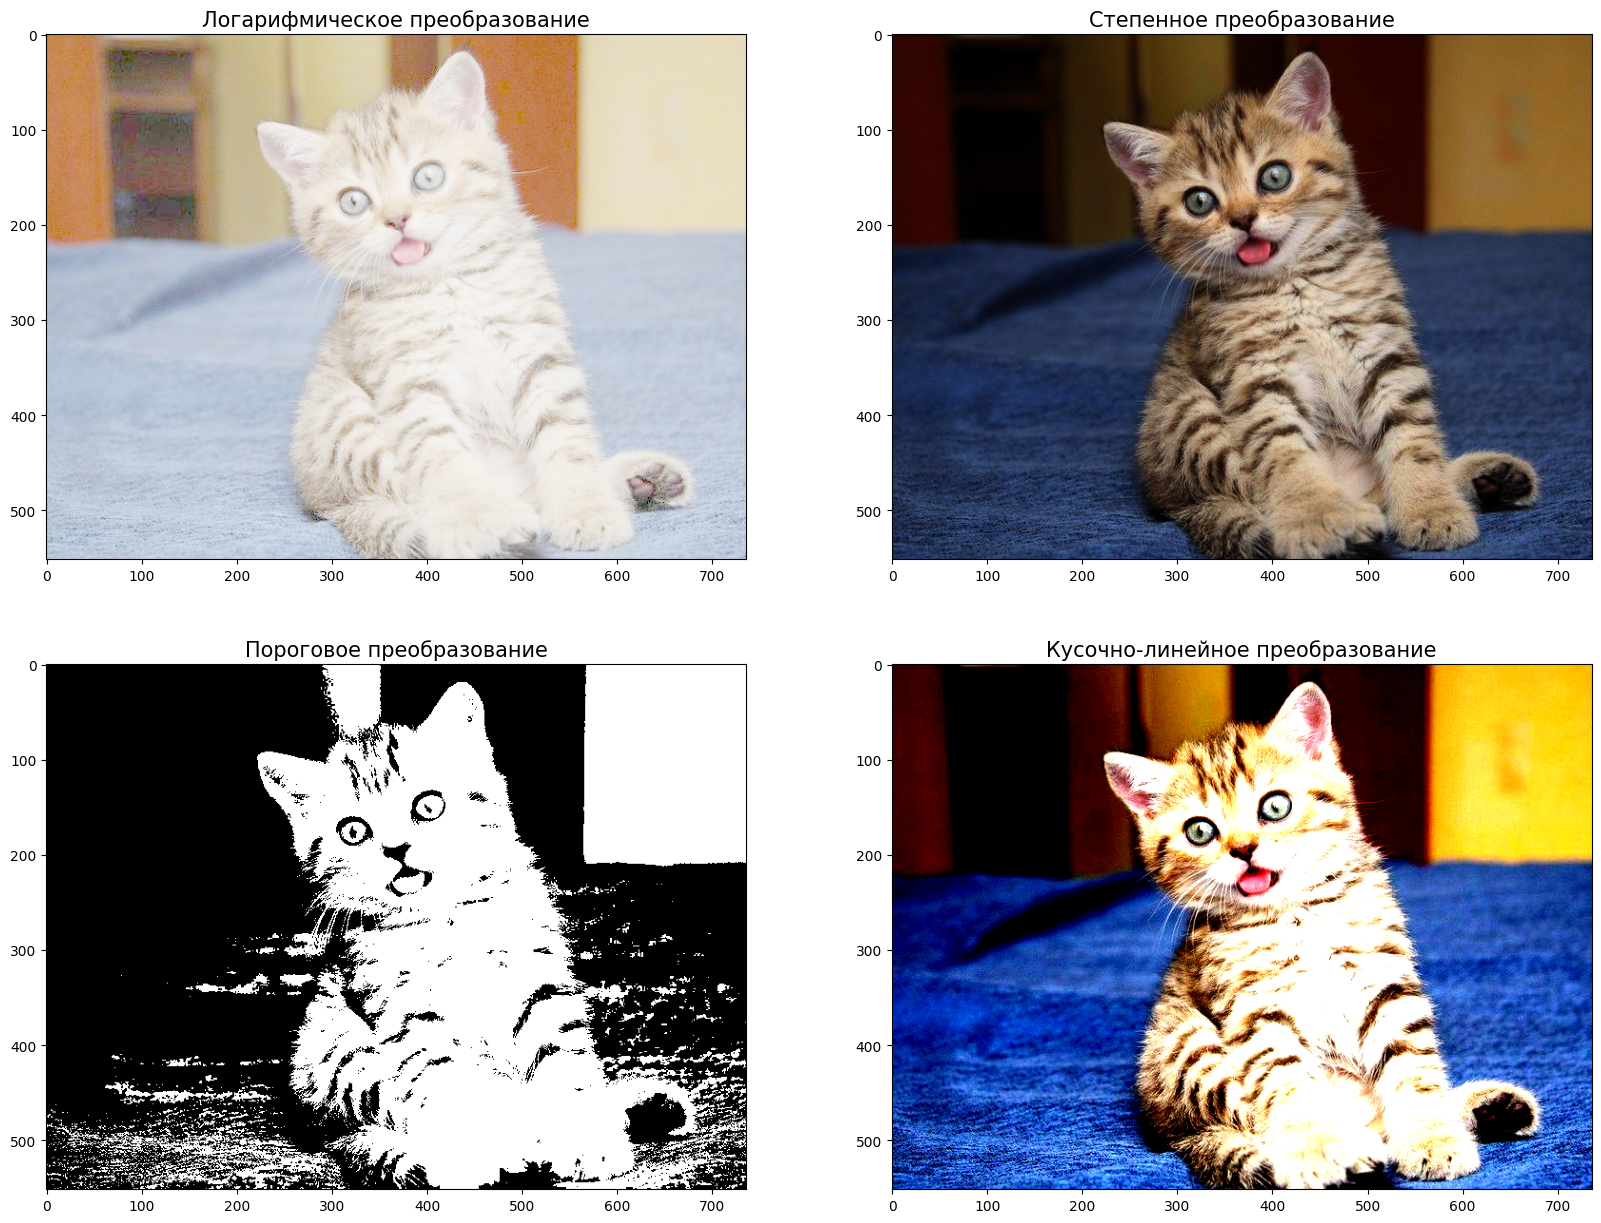

In [61]:
plt.figure(figsize=(20, 15))
plt.subplot(221), plt.imshow(logarithmic_transformation_image), plt.title('Логарифмическое преобразование', fontsize=15)
plt.subplot(222), plt.imshow(power_transformation_image), plt.title('Степенное преобразование', fontsize=15)
plt.subplot(223), plt.imshow(threshold_transformation_image, cmap='gray'), plt.title('Пороговое преобразование', fontsize=15)
plt.subplot(224), plt.imshow(piecewise_linear_transformation_image), plt.title('Кусочно-линейное преобразование', fontsize=15)
plt.show()